In [1]:
# Import libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter, defaultdict
from rdflib import Graph, Namespace, URIRef, BNode
from rdflib.namespace import RDF, RDFS
import random
from IPython.display import display, HTML
import re
import networkx as nx
from pyvis.network import Network
from tqdm import tqdm
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go


# Add the project root to Python's path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from src.ground_truth_generation.generate_ground_truth import BASE_ACTORS
from notebooks.utils import export_test_dataset, load_all_turtle_files, extract_article_metrics, rename_actor_columns

# Define paths
turtle_dir = os.path.join(project_root, "polianna-processed", "turtle")
raw_text_dir = os.path.join(project_root, "polianna-dataset", "data", "03a_processed_to_jsonl")

# Define namespaces
POLIANN = Namespace("https://polianna-kg.org/Ontology#")
ELI     = Namespace("http://data.europa.eu/eli/ontology#")
SKOS    = Namespace("http://www.w3.org/2004/02/skos/core#")

In [2]:
# load all turtle files
graphs = load_all_turtle_files(turtle_dir)

# Extract article metrics
article_metrics = extract_article_metrics(graphs)

article_metrics

Loaded 100 files...
Loaded 200 files...
Loaded 300 files...
Loaded 400 files...
Loaded 412 Turtle files in total.


,article_id,total_triples,text_length,density_metric,actor_count,instrument_count,has_objective,has_monitoring_form,has_sanctioning_form,relation_direct_addresses,...,has_instrument_PublicInvt,has_instrument_TaxIncentives,property_diversity,class_diversity,instrument_diversity,compliance_diversity,policy_id,chapter,section,coverage_score
0,EU_32012L0027_Title_0_Chapter_4_Section_0_Arti...,12,1624,135.333333,4,3,0,1,0,2,...,0,0,7,0,3,1,32012L0027,4,0,15
1,EU_32019L0944_Title_0_Chapter_6_Section_2_Arti...,10,4082,408.200000,2,2,1,1,0,0,...,0,0,4,0,2,2,32019L0944,6,2,12
2,EU_32018R1999_Title_0_Chapter_6_Section_3_Arti...,37,3495,94.459459,3,0,1,1,0,0,...,0,0,12,9,0,2,32018R1999,6,3,34
3,EU_32018R1999_Title_0_Chapter_7_Section_3_Arti...,17,826,48.588235,3,0,0,1,0,0,...,0,0,6,3,0,1,32018R1999,7,3,14
4,EU_32019R0631_Title_0_Chapter_0_Section_0_Arti...,8,275,34.375000,0,0,0,0,0,0,...,0,0,1,1,0,0,32019R0631,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,EU_32019R0631_Title_0_Chapter_0_Section_0_Arti...,53,2846,53.698113,0,1,1,0,0,0,...,0,0,13,12,1,1,32019R0631,0,0,41
408,EU_32018R1999_Title_0_Chapter_7_Section_3_Arti...,16,711,44.437500,3,0,1,1,0,0,...,0,0,5,2,0,2,32018R1999,7,3,13
409,EU_32018R1999_Title_0_Chapter_7_Section_3_Arti...,14,1072,76.571429,5,0,0,1,0,0,...,0,0,6,1,0,1,32018R1999,7,3,10
410,EU_32008R1099_Title_0_Chapter_0_Section_0_Arti...,8,1074,134.250000,1,1,0,1,0,0,...,0,0,2,0,1,1,32008R1099,0,0,6


In [3]:
article_metrics_renamed = rename_actor_columns(article_metrics)

# save to CSV
article_metrics_renamed.to_csv(os.path.join(project_root, "polianna-processed", "ground_truth_metrics.csv"), index=False)

In [4]:
article_metrics_renamed.describe()

,total_triples,text_length,density_metric,count_actor,instrument_count,has_policy_objective,has_monitoring_provisions,has_sanctioning_provisions,relation_direct_addresses,relation_direct_authorises,...,has_instrument_Subsidies,has_instrument_Voluntary_Agreement,has_instrument_Tradable_Permit,has_instrument_Public_Investment,has_instrument_Tax_Incentives,property_diversity,class_diversity,instrument_diversity,compliance_diversity,coverage_score
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,...,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,15.060680,2309.237864,153.522478,2.264563,1.334951,0.495146,0.565534,0.055825,0.514563,0.577670,...,0.082524,0.063107,0.121359,0.072816,0.070388,5.393204,1.793689,1.334951,1.116505,13.883495
std,11.909787,2780.676007,141.090280,1.943335,1.370329,0.500584,0.496289,0.229863,0.601928,0.790015,...,0.275496,0.243451,0.326941,0.260149,0.256111,4.604637,2.891158,1.370329,0.871846,12.136732
min,4.000000,57.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.750000,639.500000,66.768605,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000
50%,12.000000,1438.000000,111.056561,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000,1.000000,1.000000,1.000000,12.000000
75%,17.250000,2964.250000,192.060000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,2.000000,18.000000
max,100.000000,29188.000000,1186.818182,12.000000,7.000000,1.000000,1.000000,1.000000,3.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,23.000000,7.000000,3.000000,81.000000


In [64]:
print(article_metrics_renamed["total_triples"].sum())

6205


In [5]:
def plot_metric_distributions(df, metrics, plot_type='histogram', figsize=(14, 8), 
                              bins=30, kde=True, normalize=False,
                              title=None, save_path=None, sort_values=True, 
                              error_bars=True, theme='default', palette='colorblind',
                              reference_line=None, horizontal=False, text_labels=False,
                              comparison_groups=None, ci=95):
    """
    Plot distributions of specified metrics from the article metrics DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing article metrics
    metrics : str or list
        Single metric name or list of metric names to visualize
    plot_type : str
        Type of plot: 'histogram', 'boxplot', 'barplot', 'violin', 'cleveland', 'forest'
    figsize : tuple
        Figure size (width, height)
    bins : int
        Number of bins for histogram
    kde : bool
        Whether to show kernel density estimate curve on histogram
    log_scale : bool
        Whether to use log scale for y-axis (or x-axis in boxplot)
    normalize : bool
        Whether to normalize values (useful when comparing metrics with different scales)
    title : str
        Optional title for the plot
    save_path : str
        Optional file path to save the figure
    sort_values : bool
        Whether to sort values (for cleveland and forest plots)
    error_bars : bool
        Whether to show error bars (for barplot, cleveland, forest plots)
    theme : str
        Plot theme: 'default', 'minimal', 'science', 'nature', 'apa'
    palette : str
        Color palette name from seaborn or 'colorblind' (default)
    reference_line : float
        Value at which to draw a reference line (useful for forest plots)
    horizontal : bool
        Whether to make the plot horizontal (for cleveland plots)
    text_labels : bool
        Whether to add text labels with values
    comparison_groups : dict
        Dictionary mapping metrics to group labels for grouped comparisons
    ci : int
        Confidence interval level (for forest plots)
        
    Returns:
    --------
    fig, ax : Figure and Axes objects
    """

    # Extract metrics from comparison_groups if metrics is None
    if metrics is None and comparison_groups is not None:
        metrics = []
        for group_metrics in comparison_groups.values():
            metrics.extend(group_metrics)
    
    # Convert single metric to list for consistent processing
    if isinstance(metrics, str):
        metrics = [metrics]
    
    # Set the aesthetic style based on theme
    if theme == 'minimal':
        sns.set_style("white")
    elif theme == 'science' or theme == 'nature':
        sns.set_style("ticks")
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['Arial']
    elif theme == 'apa':
        sns.set_style("whitegrid")
        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.serif'] = ['Times New Roman']
    else:
        sns.set_style("whitegrid")
    
    # Set color palette
    if palette == 'colorblind':
        colors = sns.color_palette("colorblind", n_colors=max(len(metrics), 8))
    else:
        colors = sns.color_palette(palette, n_colors=max(len(metrics), 8))
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create a copy of the data for potential normalization
    plot_data = df.copy()
    
    # Normalize if requested
    if normalize and len(metrics) > 1:
        for metric in metrics:
            max_val = plot_data[metric].max()
            if max_val > 0:  # Avoid division by zero
                plot_data[metric] = plot_data[metric] / max_val
    
    # Generate the appropriate plot type
    if plot_type == 'histogram':
        for i, metric in enumerate(metrics):
            sns.histplot(plot_data[metric], bins=bins, kde=kde, 
                         label=metric, ax=ax, alpha=0.7, color=colors[i])
        ax.legend(frameon=True, framealpha=0.7, edgecolor='lightgray')
        
    elif plot_type == 'boxplot':
        melted_data = pd.melt(plot_data[metrics], var_name='Metric', value_name='Value')
        sns.boxplot(x='Metric' if not horizontal else 'Value', 
                    y='Value' if not horizontal else 'Metric', 
                    data=melted_data, ax=ax, palette=colors)
        
        # Add individual points for better distribution visibility
        sns.stripplot(x='Metric' if not horizontal else 'Value', 
                      y='Value' if not horizontal else 'Metric', 
                      data=melted_data, ax=ax, size=3, alpha=0.3, color='black',
                      jitter=True)
        
    elif plot_type == 'barplot':
        # For barplot, calculate means of each metric
        summary = pd.DataFrame({
            'Mean': [plot_data[m].mean() for m in metrics],
            'Std': [plot_data[m].std() for m in metrics]
        }, index=metrics)
        
        # Sort if requested
        if sort_values:
            summary = summary.sort_values(by='Mean', ascending=not horizontal)
            
        if horizontal:
            summary.plot(kind='barh', y='Mean', xerr='Std' if error_bars else None, 
                       ax=ax, legend=False, color=colors)
            ax.set_xlabel('Average Value')
        else:
            summary.plot(kind='bar', y='Mean', yerr='Std' if error_bars else None, 
                       ax=ax, legend=False, color=colors)
            ax.set_ylabel('Average Value')
        
        # Add text labels if requested
        if text_labels:
            for i, (idx, row) in enumerate(summary.iterrows()):
                text_x = i if not horizontal else row['Mean'] + row['Std'] + 0.05
                text_y = row['Mean'] + row['Std'] + 0.05 if not horizontal else i
                ha = 'center' if not horizontal else 'left'
                va = 'bottom' if not horizontal else 'center'
                ax.text(text_x, text_y, f"{row['Mean']:.2f}", ha=ha, va=va, fontsize=9)
        
    elif plot_type == 'violin':
        melted_data = pd.melt(plot_data[metrics], var_name='Metric', value_name='Value')
        sns.violinplot(x='Metric' if not horizontal else 'Value', 
                      y='Value' if not horizontal else 'Metric', 
                      data=melted_data, ax=ax, palette=colors)
        
        # Add box plot inside violin for better summary stats
        sns.boxplot(x='Metric' if not horizontal else 'Value', 
                   y='Value' if not horizontal else 'Metric', 
                   data=melted_data, ax=ax, width=0.15, color='white', 
                   showfliers=False, saturation=1)
    
    elif plot_type == 'cleveland':
        # For Cleveland dot plot - horizontal by default
        summary = pd.DataFrame({
            'Mean': [plot_data[m].mean() for m in metrics],
            'Lower': [plot_data[m].mean() - (plot_data[m].std() if error_bars else 0) for m in metrics],
            'Upper': [plot_data[m].mean() + (plot_data[m].std() if error_bars else 0) for m in metrics]
        }, index=metrics)
        
        # Sort values if requested
        if sort_values:
            summary = summary.sort_values(by='Mean')
        
        # Plot the dots and lines
        for i, (metric, row) in enumerate(summary.iterrows()):
            ax.plot([row['Lower'], row['Upper']], [i, i], '-', color='gray', alpha=0.6, lw=1.5)
            ax.scatter(row['Mean'], i, s=80, color=colors[i % len(colors)], zorder=3, edgecolor='black', linewidth=0.5)
            
            # Add text labels if requested
            if text_labels:
                ax.text(row['Upper'] + (summary['Upper'].max() - summary['Lower'].min()) * 0.02, 
                       i, f"{row['Mean']:.2f}", va='center', fontsize=9)
        
        # Set y-tick labels to metric names
        ax.set_yticks(range(len(metrics)))
        ax.set_yticklabels(summary.index)
        
        # Add subtle grid lines
        ax.grid(axis='x', linestyle='--', alpha=0.3)
        
        # Adjust plot limits
        buffer = (summary['Upper'].max() - summary['Lower'].min()) * 0.1
        ax.set_xlim(summary['Lower'].min() - buffer, 
                   summary['Upper'].max() + buffer * (3 if text_labels else 1))
        
        # Label axes
        ax.set_xlabel('Value')
        ax.set_ylabel('')
        
    elif plot_type == 'forest':
        # For forest/coefficient plot
        if comparison_groups:
            # For comparing groups of metrics
            # Prepare data for grouped comparison
            group_data = []
            for group, group_metrics in comparison_groups.items():
                for m in group_metrics:
                    if m in plot_data.columns:
                        group_data.append({
                            'Group': group,
                            'Metric': m,
                            'Mean': plot_data[m].mean(),
                            'Lower': plot_data[m].mean() - (1.96 * plot_data[m].std() / np.sqrt(len(plot_data))),
                            'Upper': plot_data[m].mean() + (1.96 * plot_data[m].std() / np.sqrt(len(plot_data)))
                        })
            
            summary = pd.DataFrame(group_data)
            if sort_values:
                summary = summary.sort_values(by=['Group', 'Mean'])
            
            # Get unique groups
            groups = summary['Group'].unique()
            group_colors = {group: colors[i % len(colors)] for i, group in enumerate(groups)}
            
            # Plot each point with error bars
            for i, row in summary.iterrows():
                color = group_colors[row['Group']]
                ax.plot([row['Lower'], row['Upper']], [i, i], '-', color=color, alpha=0.6, lw=1.5)
                ax.scatter(row['Mean'], i, s=60, color=color, zorder=3, edgecolor='black', linewidth=0.5)
                
                # Add text labels if requested
                if text_labels:
                    ax.text(row['Upper'] + (summary['Upper'].max() - summary['Lower'].min()) * 0.02, 
                           i, f"{row['Mean']:.2f}", va='center', fontsize=9)
            
            # Set y-tick labels to metric names
            ax.set_yticks(range(len(summary)))
            ax.set_yticklabels(summary['Metric'])
            
            # Create legend for groups
            from matplotlib.lines import Line2D
            legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, 
                                     markersize=8, label=group) 
                              for group, color in group_colors.items()]
            ax.legend(handles=legend_elements, title="Groups", frameon=True, 
                     framealpha=0.7, edgecolor='lightgray')
            
        else:
            # For single group of metrics
            summary = pd.DataFrame({
                'Mean': [plot_data[m].mean() for m in metrics],
                'Lower': [plot_data[m].mean() - (1.96 * plot_data[m].std() / np.sqrt(len(plot_data))) for m in metrics],
                'Upper': [plot_data[m].mean() + (1.96 * plot_data[m].std() / np.sqrt(len(plot_data))) for m in metrics]
            }, index=metrics)
            
            # Sort values if requested
            if sort_values:
                summary = summary.sort_values(by='Mean')
            
            # Plot each point with error bars
            for i, (metric, row) in enumerate(summary.iterrows()):
                ax.plot([row['Lower'], row['Upper']], [i, i], '-', color='gray', alpha=0.6, lw=1.5)
                ax.scatter(row['Mean'], i, s=60, color=colors[i % len(colors)], zorder=3, edgecolor='black', linewidth=0.5)
                
                # Add text labels if requested
                if text_labels:
                    ax.text(row['Upper'] + (summary['Upper'].max() - summary['Lower'].min()) * 0.02, 
                           i, f"{row['Mean']:.2f}", va='center', fontsize=9)
            
            # Set y-tick labels to metric names
            ax.set_yticks(range(len(metrics)))
            ax.set_yticklabels(summary.index)
        
        # Add subtle grid lines
        ax.grid(axis='x', linestyle='--', alpha=0.3)
        
        # Add reference line if specified
        if reference_line is not None:
            ax.axvline(x=reference_line, color='red', linestyle='--', alpha=0.7, 
                      label=f'Reference ({reference_line})')
            ax.legend(frameon=True, framealpha=0.7, edgecolor='lightgray')
        
        # Adjust plot limits
        buffer = (summary['Upper'].max() - summary['Lower'].min()) * 0.1
        ax.set_xlim(min(summary['Lower'].min() - buffer, 
                        reference_line - buffer if reference_line is not None else float('inf')), 
                   max(summary['Upper'].max() + buffer * (3 if text_labels else 1),
                      reference_line + buffer if reference_line is not None else float('-inf')))
        
        # Label axes
        ax.set_xlabel('Value')
        ax.set_ylabel('')
    
    # Set title with appropriate font size
    if title:
        ax.set_title(title, fontsize=14, fontweight='bold')
    else:
        metric_str = ', '.join(metrics) if len(metrics) <= 3 else f"{len(metrics)} metrics"
        ax.set_title(f"Distribution of {metric_str}", fontsize=14, fontweight='bold')
    
    # Enhance appearance for publication
    if theme in ['science', 'nature']:
        # Publication-ready adjustments
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        for tick in ax.get_xticklabels():
            tick.set_fontname('Arial')
        for tick in ax.get_yticklabels():
            tick.set_fontname('Arial')
    
    plt.tight_layout()
    
    # Save if path is provided (with high DPI for publication)
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        # Also save vector format if needed
        if save_path.endswith('.png') or save_path.endswith('.jpg'):
            vector_path = save_path.rsplit('.', 1)[0] + '.pdf'
            plt.savefig(vector_path, format='pdf', bbox_inches='tight')
    
    return fig, ax

In [59]:
def plot_metric_distributions_subplots(df, metrics, nrows=2, ncols=2, figsize=(16, 12), 
                                      bins=30, kde=True, log_scale=False, theme='science',
                                      title=None, save_path=None, share_y=False, 
                                      normalize=False):
    """
    Plot multiple metric distributions as subplots with consistent single color.
    
    Args:
        df: DataFrame containing the metrics
        metrics: List of metric column names to plot
        nrows, ncols: Grid layout for subplots
        figsize: Overall figure size
        bins: Number of histogram bins
        kde: Whether to show density curve
        log_scale: Whether to use log scale
        theme: Plot style ('science', 'nature', 'apa')
        title: Main figure title
        save_path: Path to save the figure
        share_y: Whether to share y-axis scale across subplots
        normalize: Whether to normalize values for comparison
        
    Returns:
        fig, axes: Figure and axes objects
    """
    # Set the aesthetic style based on theme
    if theme == 'minimal':
        sns.set_style("white")
        hist_color = '#4c72b0'  # Standard blue
    elif theme == 'science':
        sns.set_style("ticks")
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['Arial']
        hist_color = '#3373B4'  # Scientific blue
    elif theme == 'nature':
        sns.set_style("ticks")
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['Arial']
        hist_color = '#386cb0'  # Nature blue
    elif theme == 'apa':
        sns.set_style("ticks")
        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.serif'] = ['Arial']
        hist_color = '#80b1d3'  # APA style dark blue
    else:
        sns.set_style("whitegrid")
        hist_color = '#1f77b4'  # Default matplotlib blue
    
    # Create figure and axes grid with shared y-axis if requested
    if share_y:
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharey=True)
    else:
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    
    # Make axes into a numpy array for easier handling
    if nrows == 1 and ncols == 1:
        axes = np.array([axes])
    elif nrows == 1:
        axes = axes.reshape(1, -1)
    elif ncols == 1:
        axes = axes.reshape(-1, 1)
    
    # Map of nice names for labels
    nice_names = {
        'total_triples': 'Number of Triplets', # Updated label
        'text_length': 'Text Length (chars)',
        'density_metric': 'Density', # Updated label
        'coverage_score': 'Coverage Score',
        'property_diversity': 'Property Diversity',
        'class_diversity': 'Class Diversity',
        'instrument_diversity': 'Instrument Diversity',
        'compliance_diversity': 'Compliance Diversity'
    }
    
    # Plot each metric in its subplot
    metric_idx = 0
    for row in range(nrows):
        for col in range(ncols):
            if metric_idx < len(metrics):
                ax = axes[row, col]
                metric = metrics[metric_idx]
                
                # Get the data, normalize if requested
                data = df[metric]
                if normalize and data.max() > 0:
                    data = data / data.max()
                
                # Plot the histogram with consistent single color
                sns.histplot(data, bins=bins, kde=kde, ax=ax, 
                            color=hist_color, alpha=0.7)
                
                # Add suitable title and x-axis label for each subplot
                nice_name = nice_names.get(metric, metric)
                ax.set_title(nice_name, fontsize=12, fontweight='bold')
                ax.set_xlabel(nice_name, fontsize=11) # Set the x-axis label explicitly
                
                # Set log scale if requested
                if log_scale:
                    ax.set_yscale('log')
                
                # Polish the subplot appearance
                ax.spines['right'].set_visible(False)
                ax.spines['top'].set_visible(False)
                
                # Only show y-labels for leftmost column if sharing y
                if share_y and col > 0:
                    ax.set_ylabel('')
                
                metric_idx += 1
            else:
                # Hide unused subplots
                axes[row, col].set_visible(False)
    
    # Add main title if provided
    if title:
        fig.suptitle(title, fontsize=16, fontweight='bold', y=1.02)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
    return fig, axes

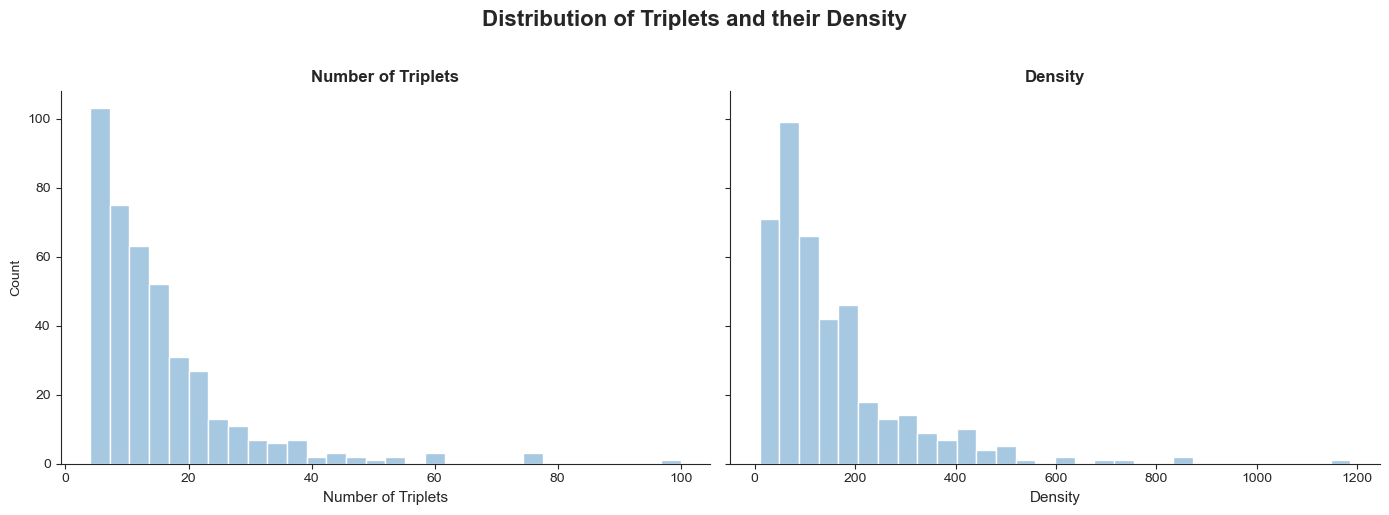

In [60]:
# List of metrics to plot with shared y-axis
relevant_columns = ['total_triples', 'density_metric']

# Create a 2x2 grid with shared y-axis
fig, axes = plot_metric_distributions_subplots(
    article_metrics, 
    relevant_columns, 
    nrows=1, # Adjusted nrows to 1 since only 2 plots
    ncols=2, # Adjusted ncols to 2 since only 2 plots
    figsize=(14, 5), # Adjusted figsize for a single row
    theme='apa',
    title='Distribution of Triplets and their Density',
    share_y=True,
    kde=False
)

plt.show()

In [8]:
import re

fig = go.Figure(go.Bar(
    x=list(range(len(px.colors.qualitative.Set3))),
    y=[1]*len(px.colors.qualitative.Set3),
    marker_color=px.colors.qualitative.Set3
))
fig.update_layout(showlegend=False, yaxis=dict(visible=False))
fig.show()

# Set3 colors are already hex codes, but if you want to ensure hex format:
def rgb_to_hex(rgb_tuple):
    return '#{:02x}{:02x}{:02x}'.format(*rgb_tuple)

# If you want to convert from rgb string to hex:
def rgb_string_to_hex(rgb_string):
    # e.g. 'rgb(141,211,199)' -> '#8dd3c7'
    nums = tuple(map(int, re.findall(r'\d+', rgb_string)))
    return rgb_to_hex(nums)

set3_colors = px.colors.qualitative.Set3
set3_colors_hex = [rgb_string_to_hex(c) if c.startswith('rgb') else c for c in set3_colors]
set3_colors_hex



['#8dd3c7',
 '#ffffb3',
 '#bebada',
 '#fb8072',
 '#80b1d3',
 '#fdb462',
 '#b3de69',
 '#fccde5',
 '#d9d9d9',
 '#bc80bd',
 '#ccebc5',
 '#ffed6f']

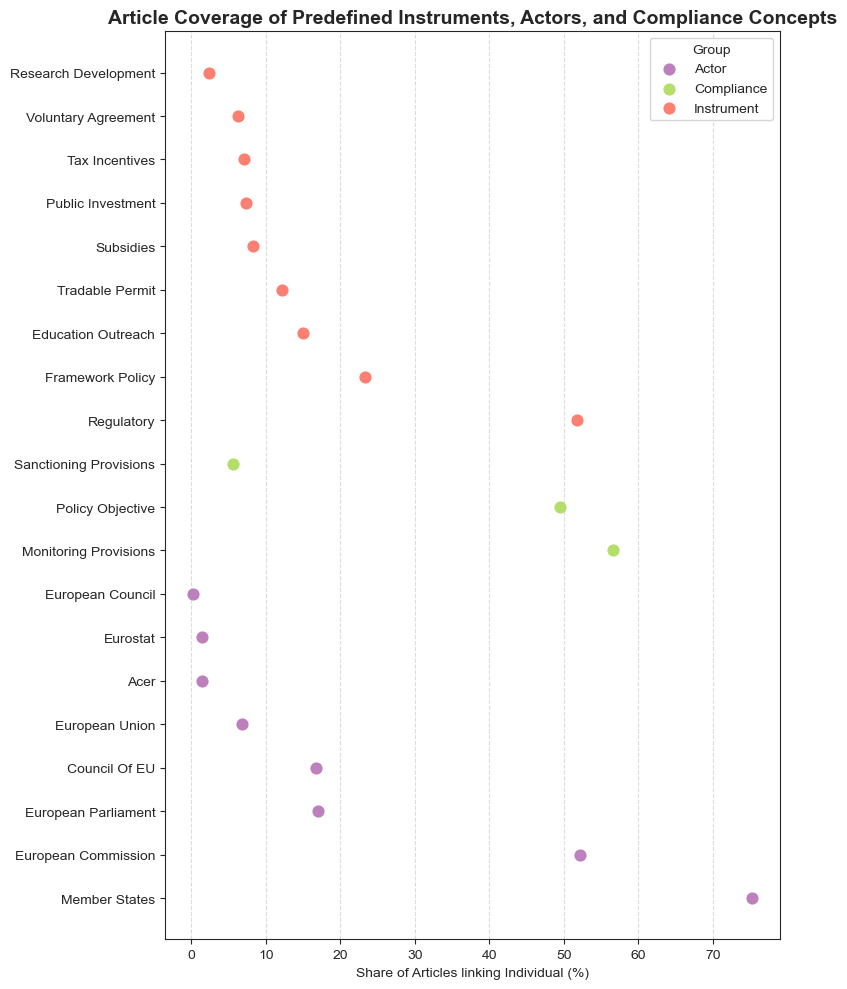

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import re

# 1. Define your flag columns and assign each to a group
instrument_cols = [c for c in article_metrics_renamed if c.startswith('has_instrument_')]
actor_cols      = [c for c in article_metrics_renamed if c.startswith('actor_')]
compliance_cols = [
    'has_policy_objective',
    'has_monitoring_provisions',
    'has_sanctioning_provisions',
]

# 2. Compute shares
shares = []
for col in instrument_cols:
    shares.append((col, 'instrument', article_metrics_renamed[col].mean()))
for col in actor_cols:
    shares.append((col, 'actor', article_metrics_renamed[col].mean()))
for col in compliance_cols:
    shares.append((col, 'compliance', article_metrics_renamed[col].mean()))

share_df = pd.DataFrame(shares, columns=['individual','group','share'])
share_df = share_df.sort_values('share', ascending=False)

# 3. Create human‐readable labels (with "EU" capitalized)
def prettify_label(col_name):
    # strip known prefixes
    for prefix in ('has_instrument_', 'actor_', 'has_'):
        if col_name.startswith(prefix):
            col_name = col_name[len(prefix):]
            break
    # replace underscores, title‐case
    label = col_name.replace('_', ' ').title()
    # ensure "EU" is fully capitalized
    label = re.sub(r'\bEu\b', 'EU', label)
    return label

share_df['label'] = share_df['individual'].map(prettify_label)

# 4. Helper to convert Plotly "rgb(r,g,b)" to matplotlib‐friendly tuple
def parse_plotly_color(c):
    if c.startswith('rgb'):
        nums = re.findall(r'\d+', c)
        return tuple(int(n)/255 for n in nums)
    return c

# 5. Pick Set3 colors and map to groups
set3 = px.colors.qualitative.Set3
group_colors = {
    'instrument': parse_plotly_color(set3[3]),
    'actor':      parse_plotly_color(set3[9]),
    'compliance': parse_plotly_color(set3[6]),
}

# 6. Plot
plt.figure(figsize=(8, 10))
for grp, sub in share_df.groupby('group'):
    plt.scatter(
        sub['share'] * 100,
        sub['label'],
        label=grp.capitalize(),
        color=group_colors[grp],
        s=60
    )

plt.xlabel('Share of Articles linking Individual (%)')
plt.grid(axis='x', linestyle='--', linewidth=0.8, alpha=0.7)
plt.title(
    'Article Coverage of Predefined Instruments, Actors, and Compliance Concepts',
    fontweight='bold',
    fontsize=14
)
plt.legend(title='Group', frameon=True)
plt.tight_layout()
plt.show()

In [10]:
print(article_metrics_renamed)

                                            article_id  total_triples  \
0    EU_32012L0027_Title_0_Chapter_4_Section_0_Arti...             12   
1    EU_32019L0944_Title_0_Chapter_6_Section_2_Arti...             10   
2    EU_32018R1999_Title_0_Chapter_6_Section_3_Arti...             37   
3    EU_32018R1999_Title_0_Chapter_7_Section_3_Arti...             17   
4    EU_32019R0631_Title_0_Chapter_0_Section_0_Arti...              8   
..                                                 ...            ...   
407  EU_32019R0631_Title_0_Chapter_0_Section_0_Arti...             53   
408  EU_32018R1999_Title_0_Chapter_7_Section_3_Arti...             16   
409  EU_32018R1999_Title_0_Chapter_7_Section_3_Arti...             14   
410  EU_32008R1099_Title_0_Chapter_0_Section_0_Arti...              8   
411  EU_32019L0944_Title_0_Chapter_2_Section_0_Arti...             13   

     text_length  density_metric  count_actor  instrument_count  \
0           1624      135.333333            4           

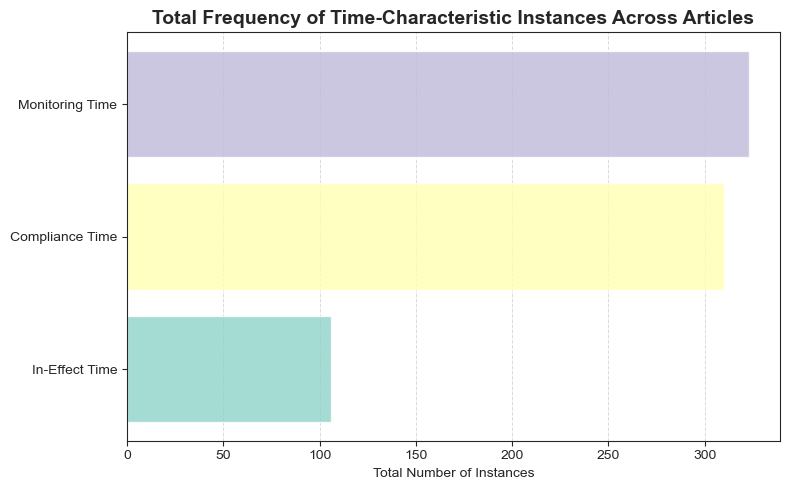

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import re

# 1. Identify the "time characteristics" instance‐count columns
time_cols = [
    'class_compliance_time_count',
    'class_in_effect_time_count',
    'class_monitoring_time_count',
]

# 2. Compute total frequency of each time‐characteristic instance across all articles
total_counts = (
    article_metrics_renamed[time_cols]
      .sum()
      .rename(index={
          'class_compliance_time_count': 'Compliance Time',
          'class_in_effect_time_count': 'In-Effect Time',
          'class_monitoring_time_count': 'Monitoring Time'
      })
      .sort_values()
)

# 3. Helper to parse Plotly "rgb(r,g,b)" strings into matplotlib tuples
def parse_plotly_color(c):
    if isinstance(c, str) and c.startswith('rgb'):
        nums = list(map(int, re.findall(r'\d+', c)))
        return tuple(n/255 for n in nums)
    return c

# 4. Pull three Set3 colors and convert them
set3 = px.colors.qualitative.Set3
colors = [parse_plotly_color(c) for c in set3[:3]]

# 5. Plot a simple bar chart of total frequencies
plt.figure(figsize=(8, 5))
plt.barh(
    total_counts.index,
    total_counts.values,
    color=colors,
    alpha=0.8
)
plt.xlabel('Total Number of Instances')
plt.title(
    'Total Frequency of Time-Characteristic Instances Across Articles',
    fontweight='bold',
    fontsize=14
)
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

# Select Test Dataset

In [ ]:
def select_test_dataset(df, n_articles=72, random_seed=42):
    """
    Select a balanced test dataset of articles based on density and coverage criteria.
    
    Parameters:
    - df: DataFrame with article metrics
    - n_articles: Target number of articles to select
    - random_seed: Random seed for reproducibility
    
    Returns:
    - DataFrame with selected articles
    """
    
    random.seed(random_seed)
    np.random.seed(random_seed)
    
    # Create a copy to avoid modifying the original dataframe
    working_df = df.copy()
    
    # Assign a unique index if not already present to avoid duplicates
    if working_df.index.duplicated().any():
        working_df = working_df.reset_index(drop=True)
    
    # Track selection priority
    working_df['selection_priority'] = 0
    
    # Initialize selected articles index set to track and avoid duplicates
    selected_indices = set()
    remaining_slots = n_articles
    
    # ---- STEP 1: Focus on density distribution ----
    # Create density quantiles
    n_density_groups = 5
    working_df['density_quantile'] = pd.qcut(working_df['density_metric'], 
                                           n_density_groups, labels=False)
    
    # Calculate articles to select from each density quantile
    # More weight to the extremes (very sparse and very dense)
    weights = [0.25, 0.25, 0.2, 0.15, 0.15]  # Emphasize lowest and highest density
    articles_per_quantile = [int(n_articles * w) for w in weights]
    
    # Adjust to ensure we get exactly n_articles
    while sum(articles_per_quantile) < n_articles:
        articles_per_quantile[weights.index(max(weights))] += 1
    
    print(f"Density-based selection: {articles_per_quantile} articles per density quantile (low to high)")
    
    # Select articles from each density quantile
    for i in range(n_density_groups):
        quantile_df = working_df[working_df['density_quantile'] == i].copy()
        n_to_select = min(articles_per_quantile[i], len(quantile_df))
        
        if n_to_select == 0:
            continue
            
        # Within each density group, prioritize by coverage with randomness
        quantile_df['random_factor'] = np.random.uniform(0.7, 1.3, size=len(quantile_df))
        quantile_df['selection_score'] = quantile_df['coverage_score'] * quantile_df['random_factor']
        
        # Sort and select
        quantile_df = quantile_df.sort_values('selection_score', ascending=False)
        selected_from_quantile = quantile_df.head(n_to_select)
        
        # Add to selected indices, ensuring no duplicates
        new_indices = set(selected_from_quantile.index) - selected_indices
        selected_indices.update(new_indices)
        
        # Track priority - FIXED: Convert set to list for pandas indexing
        if new_indices:  # Only update if we have new indices
            working_df.loc[list(new_indices), 'selection_priority'] = 10 - i  # Higher priority for sparser articles
        
        # Update remaining slots
        remaining_slots = n_articles - len(selected_indices)
        
        print(f"Selected {len(new_indices)} articles from density quantile {i}. Remaining: {remaining_slots}")
    
    # ---- STEP 2: Fill any remaining slots with high coverage articles ----
    if remaining_slots > 0:
        # Get unselected articles
        remaining_df = working_df[~working_df.index.isin(selected_indices)].copy()
        
        if len(remaining_df) > 0:
            # Sort by coverage score with randomness
            remaining_df['random_factor'] = np.random.uniform(0.8, 1.2, size=len(remaining_df))
            remaining_df['selection_score'] = remaining_df['coverage_score'] * remaining_df['random_factor']
            remaining_df = remaining_df.sort_values('selection_score', ascending=False)
            
            # Select top articles
            additional = remaining_df.head(remaining_slots)
            
            # Add to selected indices
            new_indices = set(additional.index) - selected_indices
            selected_indices.update(new_indices)
            
            # Track priority - FIXED: Convert set to list for pandas indexing
            if new_indices:  # Only update if we have new indices
                working_df.loc[list(new_indices), 'selection_priority'] = 5
            
            print(f"Added {len(new_indices)} high-coverage articles to fill remaining slots.")
    
    # ---- Create final selection dataframe ----
    # FIXED: Convert set to list for pandas indexing
    selected_articles = working_df.loc[list(selected_indices)].copy()
    
    # ---- Final statistics reporting ----
    print("\nFinal Selection Statistics:")
    print(f"Total articles selected: {len(selected_articles)}")
    
    # Report policy coverage (even though it wasn't a selection criterion)
    policy_counts = selected_articles['policy_id'].value_counts()
    total_policies = len(working_df['policy_id'].unique())
    print(f"Policies covered: {len(policy_counts)} of {total_policies}")
    if len(policy_counts) > 0:  # Check if we have any policies
        print(f"Min articles per policy: {policy_counts.min()}")
        print(f"Max articles per policy: {policy_counts.max()}")
        print(f"Mean articles per policy: {policy_counts.mean():.2f}")
        
        # Check for policies with very low representation
        low_policies = policy_counts[policy_counts < 2]
        if len(low_policies) > 0:
            print(f"Warning: {len(low_policies)} policies have fewer than 2 articles:")
            for policy, count in low_policies.items():
                print(f"  - Policy {policy}: {count} articles")
    
    # Density distribution
    density_counts = selected_articles['density_quantile'].value_counts().sort_index()
    print("\nDensity distribution:")
    for quantile, count in density_counts.items():
        print(f"  Quantile {quantile}: {count} articles")
    
    # Coverage score statistics
    print(f"\nCoverage score: min={selected_articles['coverage_score'].min():.2f}, " +
          f"max={selected_articles['coverage_score'].max():.2f}, " +
          f"mean={selected_articles['coverage_score'].mean():.2f}")
    
    # Verify no duplicates in final selection
    if selected_articles.index.duplicated().any():
        print("WARNING: Duplicate articles in final selection!")
        duplicate_indices = selected_articles.index[selected_articles.index.duplicated()].tolist()
        print(f"Duplicate indices: {duplicate_indices}")
    else:
        print("No duplicate articles in the selection ✓")
    
    return selected_articles

In [ ]:
# selected_articles = select_test_dataset(article_metrics, n_articles=42)
# selected_articles

Density-based selection: [12, 10, 8, 6, 6] articles per density quantile (low to high)
Selected 12 articles from density quantile 0. Remaining: 30
Selected 10 articles from density quantile 1. Remaining: 20
Selected 8 articles from density quantile 2. Remaining: 12
Selected 6 articles from density quantile 3. Remaining: 6
Selected 6 articles from density quantile 4. Remaining: 0

Final Selection Statistics:
Total articles selected: 42
Policies covered: 15 of 18
Min articles per policy: 1
Max articles per policy: 11
Mean articles per policy: 2.80
  - Policy 32014R0421: 1 articles
  - Policy 32009R0079: 1 articles
  - Policy 32006L0032: 1 articles
  - Policy 32014R0256: 1 articles
  - Policy 32018L0844: 1 articles
  - Policy 32014L0094: 1 articles

Density distribution:
  Quantile 0: 12 articles
  Quantile 1: 10 articles
  Quantile 2: 8 articles
  Quantile 3: 6 articles
  Quantile 4: 6 articles

Coverage score: min=15.00, max=81.00, mean=37.90
No duplicate articles in the selection ✓


,article_id,total_triples,text_length,density_metric,actor_count,instrument_count,has_objective,has_monitoring_form,has_sanctioning_form,relation_direct_addresses,...,property_diversity,class_diversity,instrument_diversity,compliance_diversity,policy_id,chapter,section,coverage_score,selection_priority,density_quantile
259,EU_32014R0421_Title_0_Chapter_0_Section_0_Arti...,61,5714,93.672131,5,4,1,1,0,0,...,23,14,4,2,32014R0421,0,0,63,8,2
391,EU_32019R0631_Title_0_Chapter_0_Section_0_Arti...,44,1436,32.636364,1,0,0,0,0,1,...,11,10,0,0,32019R0631,0,0,31,10,0
9,EU_32012L0027_Title_0_Chapter_2_Section_0_Arti...,23,4165,181.086957,4,4,1,1,0,1,...,11,3,4,2,32012L0027,2,0,29,7,3
394,EU_32012L0027_Title_0_Chapter_2_Section_0_Arti...,59,5724,97.016949,3,3,1,1,0,0,...,19,13,3,2,32012L0027,2,0,55,8,2
265,EU_32012L0027_Title_0_Chapter_3_Section_0_Arti...,36,8328,231.333333,6,2,1,1,0,0,...,15,7,2,2,32012L0027,3,0,37,6,4
398,EU_32009L0028_Title_0_Chapter_0_Section_0_Arti...,50,9612,192.240000,8,3,1,1,0,0,...,20,9,3,2,32009L0028,0,0,48,7,3
147,EU_32009R0079_Title_0_Chapter_0_Section_0_Arti...,21,480,22.857143,1,0,0,0,0,1,...,6,5,0,0,32009R0079,0,0,16,10,0
20,EU_32009L0028_Title_0_Chapter_0_Section_0_Arti...,33,6446,195.333333,7,1,0,1,0,0,...,14,6,1,1,32009L0028,0,0,30,7,3
19,EU_32009L0028_Title_0_Chapter_0_Section_0_Arti...,33,8607,260.818182,9,2,1,1,1,0,...,15,4,2,3,32009L0028,0,0,33,6,4
406,EU_32019R0631_Title_0_Chapter_0_Section_0_Arti...,34,4885,143.676471,6,4,1,1,1,0,...,15,5,4,3,32019R0631,0,0,39,7,3


In [ ]:
# export_test_dataset(selected_articles, os.path.join(project_root, "test_data"))

Exported 42 test articles to /Users/oskarkrafft/Desktop/Projects/LLM-policy-knowledge-graphs/test_data


## Analyse Test Dataset

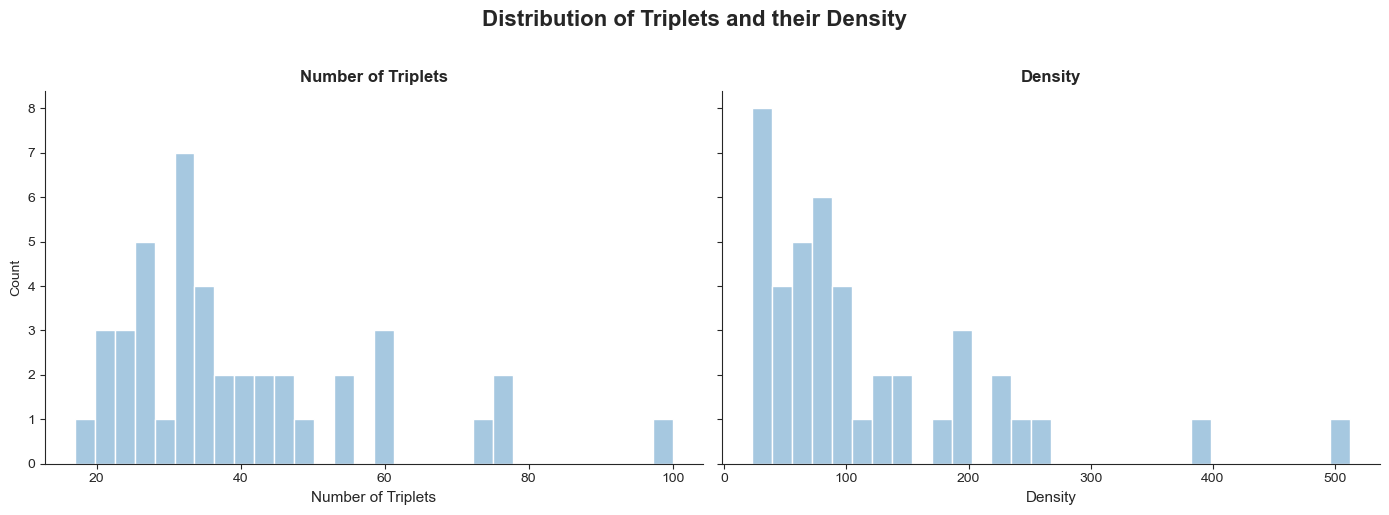

In [54]:
# List of metrics to plot with shared y-axis
relevant_columns = ['total_triples', 'density_metric']

# Create a 2x2 grid with shared y-axis
fig, axes = plot_metric_distributions_subplots(
    selected_articles, 
    relevant_columns, 
    nrows=1, # Adjusted nrows to 1 since only 2 plots
    ncols=2, # Adjusted ncols to 2 since only 2 plots
    figsize=(14, 5), # Adjusted figsize for a single row
    theme='apa',
    title='Distribution of Triplets and their Density',
    share_y=True,
    kde=False
)

plt.show()

Analyzing 42 graphs from the selected test set.


Recalculating Triple Counts: 100%|██████████| 42/42 [00:00<00:00, 2563.16it/s]

Total Triples: 1678
  Core: 168
  Policy Chars: 85
  Compliance Chars: 74
  Actors: 198
  Time: 1153
  Other: 0
Counted Sum: 1678



/var/folders/m6/307xrgj965n12rdn5pb6sx2r0000gn/T/ipykernel_22336/755303294.py:171: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



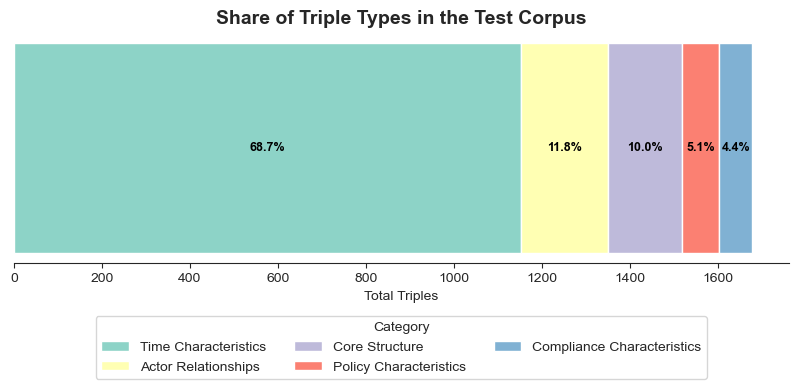

In [ ]:
# --- Filter graphs for selected test articles ---
selected_article_ids = set(selected_articles['article_id'])
test_graphs = {k: v for k, v in graphs.items() if k in selected_article_ids}
print(f"Analyzing {len(test_graphs)} graphs from the selected test set.")

# Recalculate sums directly from graphs
core_sum = 0
instrument_sum = 0
objective_sum = 0
compliance_form_sum = 0
actor_sum = 0
time_sum = 0
total_triples_sum = 0

# Define predicates for counting based on generate_ground_truth.py
actor_predicates = [
    POLIANN.addresses, POLIANN.grants_resources, POLIANN.imposes_monitoring,
    POLIANN.authorises, POLIANN.establishes_authority,
    POLIANN.grants_legislative_authority, POLIANN.grants_monitoring_authority
]
time_spec_predicates = [
    POLIANN.specifies_compliance_time, POLIANN.specifies_in_effect_time,
    POLIANN.specifies_monitoring_time
]
time_instance_predicates = [
    RDF.type, POLIANN.annotatedText, POLIANN.Compliance_date, POLIANN.In_effect_date
] # Predicates attached *to* the time instance BNode/URI

# Iterate through all loaded graphs
for g in tqdm(test_graphs.values(), desc="Recalculating Triple Counts"):
    total_triples_sum += len(g)
    article_uri = None
    doc_uri = None

    # Find article and doc URIs (assuming one per graph)
    for s, p, o in g.triples((None, RDF.type, POLIANN.PolicyArticle)):
        article_uri = s
        break
    for s, p, o in g.triples((None, RDF.type, POLIANN.PolicyDocument)):
        doc_uri = s
        break

    if not article_uri or not doc_uri:
        print(f"Warning: Skipping graph, couldn't find PolicyArticle or PolicyDocument.")
        continue # Skip graphs without core structure

    # 1. Core triples
    core_count_this_graph = 0
    if (doc_uri, RDF.type, POLIANN.PolicyDocument) in g: core_count_this_graph += 1
    if (article_uri, RDF.type, POLIANN.PolicyArticle) in g: core_count_this_graph += 1
    if (doc_uri, POLIANN.hasArticle, article_uri) in g: core_count_this_graph += 1
    core_count_this_graph += len(list(g.triples((article_uri, POLIANN.fullText, None)))) # Usually 1, can be 0
    core_sum += core_count_this_graph

    # 2. Policy Characteristics (Instruments, Objectives, Compliance Forms)
    instrument_sum += len(list(g.triples((article_uri, POLIANN.contains_instrument, None))))
    objective_sum += len(list(g.triples((article_uri, POLIANN.contains_objective, POLIANN.Objective))))
    compliance_form_sum += len(list(g.triples((article_uri, POLIANN.contains_monitoring_form, POLIANN.Form_monitoring))))
    compliance_form_sum += len(list(g.triples((article_uri, POLIANN.contains_sanctioning_form, POLIANN.Form_sanctioning))))

    # 3. Actor triples
    for pred in actor_predicates:
        actor_sum += len(list(g.triples((article_uri, pred, None))))

    # 4. Time triples (Link + Instance Definition)
    time_instances_in_graph = set()
    time_count_this_graph = 0
    # Count link from article to time instance
    for pred in time_spec_predicates:
        for s, p, o in g.triples((article_uri, pred, None)):
            time_count_this_graph += 1
            if isinstance(o, (URIRef, BNode)): # Ensure it's a resource node
                 time_instances_in_graph.add(o) # Collect time instances

    # Count triples defining the time instance (type, text, date)
    for time_instance in time_instances_in_graph:
        for pred in time_instance_predicates:
             time_count_this_graph += len(list(g.triples((time_instance, pred, None))))
    time_sum += time_count_this_graph


# --- Define categories ---
core_category_sum = core_sum
policy_char_sum = instrument_sum
compliance_char_sum = objective_sum + compliance_form_sum
actor_category_sum = actor_sum
time_category_sum = time_sum

# --- Calculate Other ---
counted_sum = core_category_sum + policy_char_sum + compliance_char_sum + actor_category_sum + time_category_sum
other_sum = total_triples_sum - counted_sum
if other_sum < 0:
    print(f"Warning: Calculated 'other_sum' is negative ({other_sum}). Check counting logic.")
    other_sum = 0 # Prevent negative share in pie chart

print(f"Total Triples: {total_triples_sum}")
print(f"  Core: {core_category_sum}")
print(f"  Policy Chars: {policy_char_sum}")
print(f"  Compliance Chars: {compliance_char_sum}")
print(f"  Actors: {actor_category_sum}")
print(f"  Time: {time_category_sum}")
print(f"  Other: {other_sum}")
print(f"Counted Sum: {counted_sum}")


# --- Prepare labels and counts for the chart ---
labels = ['Core Structure', 'Policy Characteristics', 'Compliance Characteristics', 'Actor Relationships', 'Time Characteristics', 'Other']
counts = [core_category_sum, policy_char_sum, compliance_char_sum, actor_category_sum, time_category_sum, other_sum]

# Filter out categories with zero count and create a DataFrame
filtered_data = [(l, c) for l, c in zip(labels, counts) if c > 0]

if not filtered_data:
    print("No triples found to plot.")
else:
    final_labels, final_counts = zip(*filtered_data)
    df_plot = pd.DataFrame({'Category': final_labels, 'Count': final_counts})
    df_plot = df_plot.sort_values('Count', ascending=False) # Optional: sort for consistent stacking order

    # Calculate percentages
    total = df_plot['Count'].sum()
    df_plot['Percentage'] = (df_plot['Count'] / total) * 100

    # --- Plotting code (Stacked Bar Chart - Horizontal) ---
    # 3. Helper to convert Plotly "rgb(r,g,b)" to matplotlib tuple
    def parse_plotly_color(c):
        if isinstance(c, str) and c.startswith('rgb'):
            nums_str = re.findall(r'\d+', c)
            if len(nums_str) == 3:
                nums = list(map(int, nums_str))
                return tuple(n/255 for n in nums)
            else:
                print(f"Warning: Could not parse RGB string '{c}' correctly. Using default color.")
                return (0.5, 0.5, 0.5)
        return c

    # 4. Grab Set3 colors and convert
    raw_colors = px.colors.qualitative.Set3[0:len(df_plot)]
    colors = [parse_plotly_color(c) for c in raw_colors]

    # 5. Plot stacked horizontal bar chart
    fig, ax = plt.subplots(figsize=(10, 3)) # Adjusted figsize for a horizontal bar
    left = 0
    bar_height = 0.6

    for i, (index, row) in enumerate(df_plot.iterrows()):
        # Use barh for horizontal bars
        ax.barh(0, row['Count'], bar_height, left=left, label=f"{row['Category']}", color=colors[i])
        # Add text label inside the bar segment
        label_x = left + row['Count'] / 2
        # Add percentage and absolute count
        label_text = f"{row['Percentage']:.1f}%"
        ax.text(label_x, 0, label_text, ha='center', va='center', color='black', fontsize=9, weight='bold')
        left += row['Count']

    # Customize the plot
    ax.set_yticks([]) # Remove y-axis ticks/labels
    ax.set_xlabel('Total Triples')
    ax.set_title(
        'Share of Triple Types in the Test Corpus', # Updated title for clarity
        fontweight='bold',
        fontsize=14,
        loc='center',
    )
    # Place legend below the plot
    ax.legend(title='Category', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=len(df_plot)//2 + len(df_plot)%2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False) # Hide left spine as well

    plt.tight_layout(rect=[0, 0.5, 1, 1]) # Adjust layout to make space for legend below
    plt.show()

In [44]:
selected_articles_renamed = rename_actor_columns(selected_articles)

In [50]:
selected_articles_renamed.describe()

,total_triples,text_length,density_metric,count_actor,instrument_count,has_policy_objective,has_monitoring_provisions,has_sanctioning_provisions,relation_direct_addresses,relation_direct_authorises,...,has_instrument_Tradable_Permit,has_instrument_Public_Investment,has_instrument_Tax_Incentives,property_diversity,class_diversity,instrument_diversity,compliance_diversity,coverage_score,selection_priority,density_quantile
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.00000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,39.952381,4909.619048,115.840958,4.309524,2.023810,0.690476,0.857143,0.214286,0.380952,1.023810,...,0.166667,0.071429,0.047619,14.333333,8.00000,2.023810,1.761905,37.904762,8.380952,1.619048
std,17.896658,5189.171953,100.866474,2.806683,1.659975,0.467901,0.354169,0.415300,0.538851,1.023816,...,0.377195,0.260661,0.215540,6.075407,4.50474,1.659975,0.849950,16.371912,1.413392,1.413392
min,17.000000,457.000000,22.857143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,2.00000,0.000000,0.000000,15.000000,6.000000,0.000000
25%,27.250000,1483.750000,48.545218,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,5.00000,1.000000,1.000000,27.000000,7.000000,0.000000
50%,35.000000,3382.000000,81.231944,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,14.000000,6.50000,2.000000,2.000000,33.000000,9.000000,1.000000
75%,46.000000,6265.500000,143.579721,6.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,17.750000,9.75000,3.000000,2.000000,44.500000,10.000000,3.000000
max,100.000000,29188.000000,512.580645,12.000000,7.000000,1.000000,1.000000,1.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,32.000000,23.00000,7.000000,3.000000,81.000000,10.000000,4.000000


In [71]:
print(selected_articles_renamed["total_triples"].sum())

1678


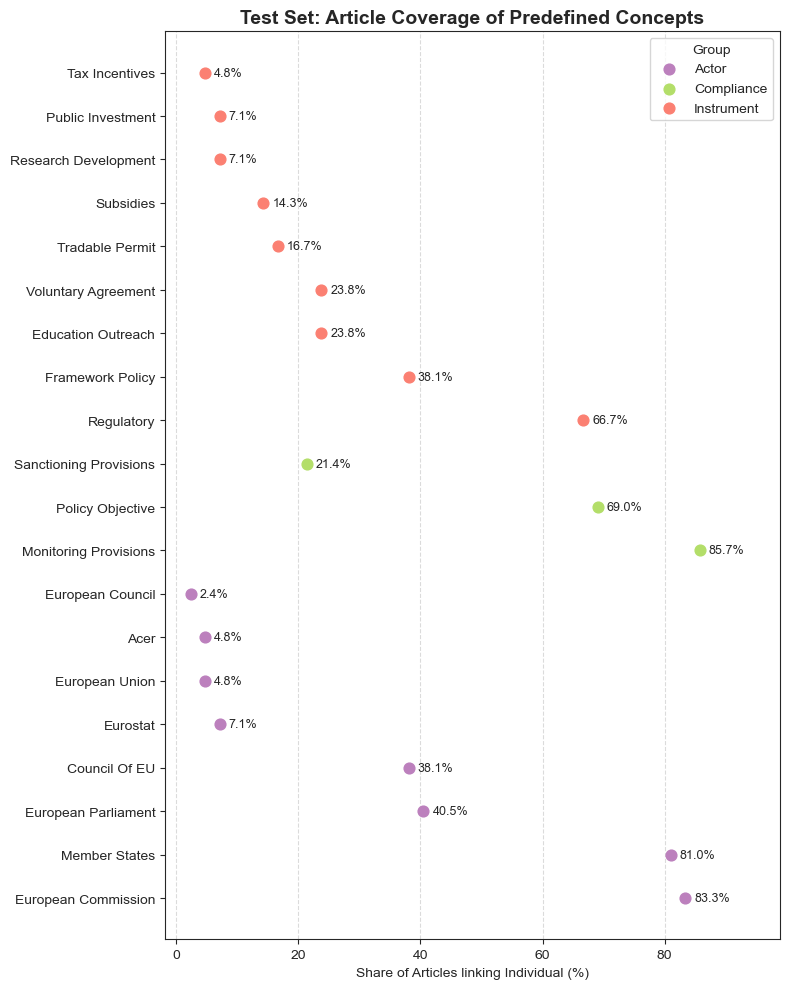

In [ ]:
# Insert this code into a new cell after the cell with id '8ecd6c44'

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import re

# --- Analysis for the Test Set ---

# 1. Define your flag columns and assign each to a group
# Use the same column definitions as before
instrument_cols = [c for c in selected_articles_renamed if c.startswith('has_instrument_')]
actor_cols      = [c for c in selected_articles_renamed if c.startswith('actor_')]
compliance_cols = [
    'has_policy_objective',
    'has_monitoring_provisions',
    'has_sanctioning_provisions',
]

# 2. Compute shares *using the selected_articles DataFrame*
shares_test = []
for col in instrument_cols:
    if col in selected_articles_renamed.columns: # Check if column exists in test set metrics
        shares_test.append((col, 'instrument', selected_articles_renamed[col].mean()))
for col in actor_cols:
     if col in selected_articles_renamed.columns:
        shares_test.append((col, 'actor', selected_articles_renamed[col].mean()))
for col in compliance_cols:
     if col in selected_articles_renamed.columns:
        shares_test.append((col, 'compliance', selected_articles_renamed[col].mean()))

share_df_test = pd.DataFrame(shares_test, columns=['individual','group','share'])
share_df_test = share_df_test.sort_values('share', ascending=False)

# 3. Create human‐readable labels (with "EU" capitalized)
# Use the same prettify_label function
def prettify_label(col_name):
    # strip known prefixes
    for prefix in ('has_instrument_', 'actor_', 'has_'):
        if col_name.startswith(prefix):
            col_name = col_name[len(prefix):]
            break
    # replace underscores, title‐case
    label = col_name.replace('_', ' ').title()
    # ensure "EU" is fully capitalized
    label = re.sub(r'\bEu\b', 'EU', label)
    return label

share_df_test['label'] = share_df_test['individual'].map(prettify_label)

# 4. Helper to convert Plotly "rgb(r,g,b)" to matplotlib‐friendly tuple
# Use the same parse_plotly_color function
def parse_plotly_color(c):
    if isinstance(c, str) and c.startswith('rgb'):
        nums_str = re.findall(r'\d+', c)
        if len(nums_str) == 3:
            nums = list(map(int, nums_str))
            return tuple(n/255 for n in nums)
        else:
            print(f"Warning: Could not parse RGB string '{c}' correctly. Using default color.")
            return (0.5, 0.5, 0.5) # Default grey
    # Handle hex codes directly if Plotly returns them
    elif isinstance(c, str) and c.startswith('#') and len(c) == 7:
        return c
    # Fallback for unexpected formats
    return c if isinstance(c, (tuple, str)) else (0.5, 0.5, 0.5)


# 5. Pick Set3 colors and map to groups
# Use the same group_colors mapping
set3 = px.colors.qualitative.Set3
group_colors = {
    'instrument': parse_plotly_color(set3[3]),
    'actor':      parse_plotly_color(set3[9]),
    'compliance': parse_plotly_color(set3[6]),
}

# 6. Plot for the Test Set
plt.figure(figsize=(8, 10))
for grp, sub in share_df_test.groupby('group'):
    # Plot the scatter points
    plt.scatter(
        sub['share'] * 100,
        sub['label'],
        label=grp.capitalize(),
        color=group_colors[grp],
        s=60
    )
    # Add text labels next to each point
    for i, row in sub.iterrows():
        plt.text(
            row['share'] * 100 + 1.5, # x-position slightly offset
            row['label'],             # y-position (same as dot)
            f"{row['share'] * 100:.1f}%", # The text label
            va='center',              # Vertical alignment
            ha='left',                # Horizontal alignment
            fontsize=9                # Font size
        )


plt.xlabel('Share of Articles linking Individual (%)')
plt.grid(axis='x', linestyle='--', linewidth=0.8, alpha=0.7)
# Adjust x-axis limits to make space for labels
current_xlim = plt.xlim()
plt.xlim(current_xlim[0], current_xlim[1] * 1.1) # Increase upper limit by 10%

plt.title(
    'Test Set: Article Coverage of Predefined Concepts', # Updated title
    fontweight='bold',
    fontsize=14
)
plt.legend(title='Group', frameon=True)
plt.tight_layout()
plt.show()

# Select one and few shot examples

In [17]:
# Find articles with high coverage not in test set
remaining_df = article_metrics[~article_metrics.index.isin(selected_articles.index)]

# Sort remaining dataframe by coverage score
example_candidates = remaining_df.sort_values('coverage_score', ascending=False)

# Display top 5 candidates
print("\nBest candidates by coverage score:")
for idx, row in example_candidates.head(5).iterrows():
    print(f"ID: {idx}")
    print(f"article_id: {row['article_id']}")
    print(f"  Coverage score: {row['coverage_score']:.2f}")
    print(f"  Location: ../test_data/{row['article_id']}")
    print()


Best candidates by coverage score:
ID: 209
article_id: EU_32012L0027_Title_0_Chapter_5_Section_0_Article_24
  Coverage score: 43.00
  Location: ../test_data/EU_32012L0027_Title_0_Chapter_5_Section_0_Article_24

ID: 2
article_id: EU_32018R1999_Title_0_Chapter_6_Section_3_Article_38
  Coverage score: 34.00
  Location: ../test_data/EU_32018R1999_Title_0_Chapter_6_Section_3_Article_38

ID: 143
article_id: EU_32018L2001_Title_0_Chapter_0_Section_0_Article_25
  Coverage score: 34.00
  Location: ../test_data/EU_32018L2001_Title_0_Chapter_0_Section_0_Article_25

ID: 385
article_id: EU_32019L0944_Title_0_Chapter_2_Section_0_Article_05
  Coverage score: 32.00
  Location: ../test_data/EU_32019L0944_Title_0_Chapter_2_Section_0_Article_05

ID: 22
article_id: EU_32018R1999_Title_0_Chapter_3_Section_0_Article_15
  Coverage score: 31.00
  Location: ../test_data/EU_32018R1999_Title_0_Chapter_3_Section_0_Article_15

